In [1]:
!jt -t grade3

# Module 3 Final Project

In [226]:
import pandas as pd
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)

In [300]:
data = pd.read_csv('accidents_2012_to_2014.csv')

In [288]:
data['Year'].value_counts()

2012    177678
2014    144664
2013    137052
Name: Year, dtype: int64

In [301]:
data = data[data['Year'] == 2014]

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146322 entries, 318375 to 464696
Data columns (total 33 columns):
Accident_Index                                 146322 non-null object
Location_Easting_OSGR                          146322 non-null int64
Location_Northing_OSGR                         146322 non-null int64
Longitude                                      146322 non-null float64
Latitude                                       146322 non-null float64
Police_Force                                   146322 non-null int64
Accident_Severity                              146322 non-null int64
Number_of_Vehicles                             146322 non-null int64
Number_of_Casualties                           146322 non-null int64
Date                                           146322 non-null object
Day_of_Week                                    146322 non-null int64
Time                                           146322 non-null object
Local_Authority_(District)                     14

In [303]:
data.drop(columns=['Junction_Detail'], axis=1, inplace=True)

In [304]:
data.dropna(inplace=True)

In [305]:
data.shape

(84778, 32)

In [306]:
data.reset_index(drop=True, inplace=True)

In [307]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,20/01/2014,2,23:00,12,E09000020,3,3218,Single carriageway,30,Giveway or uncontrolled,3,3220,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lighting unknown,Fine without high winds,Dry,None,None,1,No,E01002894,2014
1,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,21/01/2014,3,10:40,12,E09000020,3,308,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002822,2014
2,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,15/01/2014,4,17:45,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,Zebra crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,No,E01002812,2014
3,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,09/01/2014,5,08:50,12,E09000020,3,4,Single carriageway,30,Giveway or uncontrolled,3,4,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2014
4,201401BS70009,524950,179240,-0.201326,51.498245,1,3,2,1,10/01/2014,6,18:25,12,E09000020,3,315,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002817,2014


In [308]:
data['Accident_Severity'].value_counts()

3    73715
2    10536
1      527
Name: Accident_Severity, dtype: int64

In [299]:
# data.to_csv('accident_data.csv')

The Random Forest will need to accept the categorical variables as numbers. The other models, like Logistic Regression, can use dummies.

In [318]:
coordinates = list(zip(data['Latitude'], data['Longitude']))

In [320]:
data['coordinates'] = coordinates

In [321]:
data.drop(columns=['Latitude', 'Longitude'], axis=1, inplace=True)

In [322]:
data.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,coordinates
0,201401BS70002,525780,178290,1,3,2,1,20/01/2014,2,23:00,12,E09000020,3,3218,Single carriageway,30,Giveway or uncontrolled,3,3220,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lighting unknown,Fine without high winds,Dry,None,None,1,No,E01002894,2014,"(51.489523, -0.18971300000000002)"
1,201401BS70003,526880,178430,1,3,2,1,21/01/2014,3,10:40,12,E09000020,3,308,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002822,2014,"(51.490536, -0.173827)"
2,201401BS70004,525580,179080,1,3,1,1,15/01/2014,4,17:45,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,Zebra crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,No,E01002812,2014,"(51.496668, -0.19231099999999998)"
3,201401BS70006,527040,179030,1,3,2,1,09/01/2014,5,08:50,12,E09000020,3,4,Single carriageway,30,Giveway or uncontrolled,3,4,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2014,"(51.495892, -0.171308)"
4,201401BS70009,524950,179240,1,3,2,1,10/01/2014,6,18:25,12,E09000020,3,315,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002817,2014,"(51.498245000000004, -0.201326)"


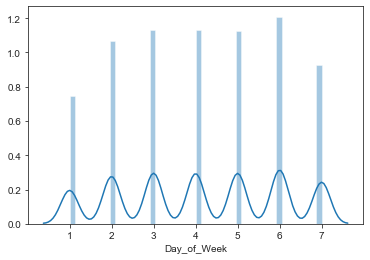

In [323]:
sns.distplot(data['Day_of_Week'])

In [325]:
len(data['Time'].value_counts())

1434

Need to convert time to a number/date time

In [327]:
data['Road_Type'].value_counts()

Single carriageway    63887
Roundabout             9751
Dual carriageway       8267
One way street         1691
Slip road              1004
Unknown                 178
Name: Road_Type, dtype: int64

In [328]:
data = data[data['Road_Type'] != 'Unknown']

In [329]:
data.reset_index(drop=True, inplace=True)

In [330]:
data.columns=data.columns.str.lower()

In [331]:
data['road_surface_conditions'].value_counts()

Dry                          61227
Wet/Damp                     22701
Frost/Ice                      547
Snow                            63
Flood (Over 3cm of water)       62
Name: road_surface_conditions, dtype: int64

In [336]:
data.loc[data['road_surface_conditions'] != 'Dry', 'road_surface_conditions'] = 'Wet/Damp'



In [337]:
data['road_surface_conditions'].value_counts()

Dry         61227
Wet/Damp    23373
Name: road_surface_conditions, dtype: int64

Data now only consists of dry or wet road conditions, where the very minor categories have been transformed into 'wet' type.  
`location_easting_osgr` and `location_northing_osgr` will be dropped 

In [346]:
data.drop(columns=['accident_index'], axis=1, inplace=True)

In [348]:
df = pd.read_csv('new_stuff.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [349]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,2,01:30,2,E09000007,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,2,00:50,17,E09000025,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,2,00:45,3,E09000019,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,2,03:00,17,E09000025,4,167,3,30,7,2,3,124,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,2,02:20,6,E09000011,3,207,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01001682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122630,2018984115718,307124.0,594145.0,-3.461918,55.232746,98,3,2,1,23/12/2018,1,13:45,917,S12000006,3,701,6,60,0,-1,-1,0,0,0,1,1,2,0,0,2,1,NaN
122631,2018984115918,313325.0,581065.0,-3.360440,55.116374,98,3,2,1,24/12/2018,2,10:45,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,1,1,1,0,0,1,1,NaN
122632,2018984116018,319337.0,574511.0,-3.264352,55.058510,98,3,3,1,20/12/2018,5,18:00,917,S12000006,4,7076,6,30,0,-1,-1,0,0,0,4,1,2,0,0,2,1,NaN
122633,2018984116318,318858.0,566932.0,-3.269695,54.990344,98,2,1,1,24/12/2018,2,11:50,917,S12000006,5,50,6,60,3,4,6,552,0,0,1,1,4,0,0,2,1,NaN


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 32 columns):
Accident_Index                                 122635 non-null object
Location_Easting_OSGR                          122580 non-null float64
Location_Northing_OSGR                         122580 non-null float64
Longitude                                      122580 non-null float64
Latitude                                       122580 non-null float64
Police_Force                                   122635 non-null int64
Accident_Severity                              122635 non-null int64
Number_of_Vehicles                             122635 non-null int64
Number_of_Casualties                           122635 non-null int64
Date                                           122635 non-null object
Day_of_Week                                    122635 non-null int64
Time                                           122622 non-null object
Local_Authority_(District)                     122

In [351]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [353]:
df.columns=df.columns.str.lower()

In [354]:
df.head()

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,2,01:30,2,E09000007,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,2,00:50,17,E09000025,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,2,00:45,3,E09000019,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,2,03:00,17,E09000025,4,167,3,30,7,2,3,124,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,2,02:20,6,E09000011,3,207,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01001682


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116181 entries, 0 to 116180
Data columns (total 32 columns):
accident_index                                 116181 non-null object
location_easting_osgr                          116181 non-null float64
location_northing_osgr                         116181 non-null float64
longitude                                      116181 non-null float64
latitude                                       116181 non-null float64
police_force                                   116181 non-null int64
accident_severity                              116181 non-null int64
number_of_vehicles                             116181 non-null int64
number_of_casualties                           116181 non-null int64
date                                           116181 non-null object
day_of_week                                    116181 non-null int64
time                                           116181 non-null object
local_authority_(district)                     116

In [357]:
coordinates = list(zip(df['latitude'], df['longitude']))

In [358]:
df['coordinates'] = coordinates

In [360]:
df.drop(columns=['latitude', 'longitude'], axis=1, inplace=True)

In [361]:
df.drop(columns=['location_easting_osgr', 'location_northing_osgr'], axis=1, inplace=True)

In [362]:
df.drop(columns=['local_authority_(highway)'], axis=1, inplace=True)

In [363]:
df.head()

,accident_index,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,coordinates
0,2018010080971,1,3,2,2,01/01/2018,2,01:30,2,3,501,3,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01000854,"(51.524587, -0.139737)"
1,2018010080973,1,3,1,1,01/01/2018,2,00:50,17,4,165,6,30,2,4,6,0,0,0,4,1,1,0,0,1,1,E01003531,"(51.539651, 0.046471)"
2,2018010080974,1,3,2,1,01/01/2018,2,00:45,3,3,1,6,20,6,4,5,0,0,5,4,1,1,0,0,1,1,E01002723,"(51.529746, -0.102474)"
3,2018010080981,1,2,2,1,01/01/2018,2,03:00,17,4,167,3,30,7,2,3,124,0,5,4,2,2,0,0,1,1,E01003492,"(51.530179, 0.037828)"
4,2018010080982,1,2,2,2,01/01/2018,2,02:20,6,3,207,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01001682,"(51.469258, 0.06578099999999999)"


In [364]:
df2 = pd.read_csv('new_dtuff2.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [366]:
df2.columns=df2.columns.str.lower()

df2.head()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile
0,2018010080971,1,9,0,18,0,0,0,0,0,0,1,1,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,0,2,1,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,0,1,1,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,1,1,1,6,1,21,5,-1,-1,-1,5,1,5


---

In [370]:
master = df.merge(df2, on='accident_index')

In [377]:
master.to_csv('master_data.csv')

In [376]:
master.drop(columns=['accident_index', 'vehicle_reference'], axis=1, inplace=True)

In [378]:
master['accident_severity'].value_counts()

3    171266
2     37635
1      2709
Name: accident_severity, dtype: int64

In [379]:
master['junction_control']

0        -1
1        -1
2         4
3         4
4         4
         ..
211605   -1
211606   -1
211607   -1
211608   -1
211609    4
Name: junction_control, Length: 211610, dtype: int64

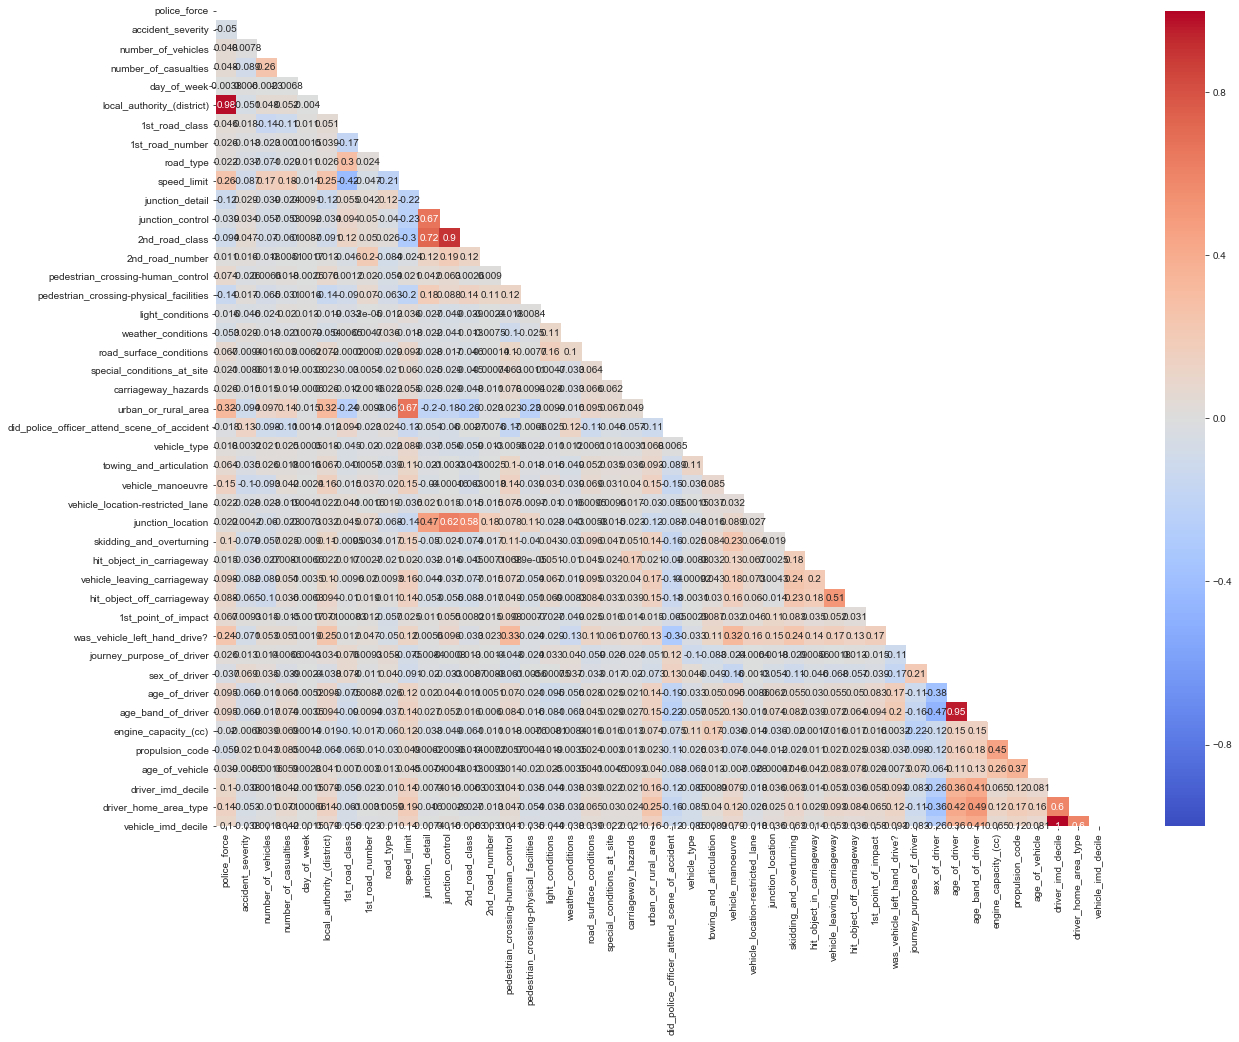

In [382]:
# Looking at the correlation matrix and seeing what interacts etc...
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(master.corr())
sns.heatmap(master.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

In [384]:
master.drop(columns=['junction_detail', 'junction_location'], axis=1, inplace=True)

In [385]:
master.shape

(211610, 46)

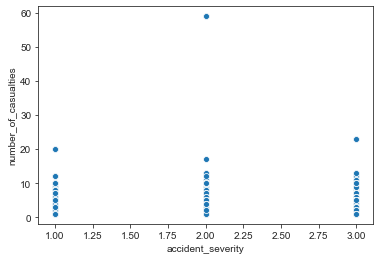

In [386]:
sns.scatterplot(master['accident_severity'], master['number_of_casualties'])

In [387]:
master.groupby('accident_severity')['number_of_casualties'].value_counts()

accident_severity  number_of_casualties
1                  1                         1579
                   2                          579
                   3                          274
                   4                          148
                   5                           55
                   7                           22
                   8                           20
                   6                           19
                   9                            4
                   10                           4
                   12                           3
                   20                           2
2                  1                        26998
                   2                         6214
                   3                         2469
                   4                         1191
                   5                          374
                   6                          229
                   7                           66
          

In [388]:
# Removing the outliers (only 3)
master = master[master['number_of_casualties'] < 50]

In [390]:
master.reset_index(drop=True, inplace=True)

In [391]:
master.describe()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),1st_road_class,1st_road_number,road_type,speed_limit,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile
count,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000,211607.000000
mean,25.353287,2.796557,2.130775,1.377218,4.100285,302.337805,4.155983,841.391117,5.126442,37.666287,1.578232,2.636534,303.273384,-0.005302,0.812927,1.963777,1.594900,1.253390,0.072781,0.039488,1.340291,1.294310,10.017263,0.012887,12.143790,0.132080,0.155226,0.261036,0.259358,0.349402,1.691910,0.928178,4.696683,1.465273,35.345442,5.901634,1435.429768,1.011077,5.763689,3.835700,0.862542,3.835700
std,19.641770,0.433196,0.914236,0.831503,1.918755,219.559243,1.493795,1657.828198,1.721724,14.338437,2.355725,3.221163,1146.982559,0.243087,1.951021,1.670919,1.758559,0.572687,0.624332,0.472798,0.473808,0.472943,11.057884,0.347127,6.701732,1.171243,0.829006,1.597391,1.284133,1.823612,1.209031,0.396770,1.969012,0.666367,20.843103,3.149363,1629.498731,1.471993,6.121700,3.539545,1.084396,3.539545
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,5.000000,3.000000,2.000000,1.000000,2.000000,91.000000,3.000000,0.000000,3.000000,30.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,23.000000,5.000000,124.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
50%,22.000000,3.000000,2.000000,1.000000,4.000000,300.000000,4.000000,41.000000,6.000000,30.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,1.000000,35.000000,6.000000,1397.000000,1.000000,5.000000,4.000000,1.000000,4.000000
75%,44.000000,3.000000,2.000000,1.000000,6.000000,494.000000,6.000000,562.000000,6.000000,40.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,9.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,6.000000,2.000000,50.000000,8.000000,1956.000000,2.000000,11.000000,7.000000,1.000000,7.000000
max,63.000000,3.000000,24.000000,23.000000,7.000000,753.000000,6.000000,9621.000000,9.000000,70.000000,4.000000,6.000000,9620.000000,2.00000

In [398]:
# -1 is the null value place holder
# Percent missing from each column
# Null values were assigned '-1'
(master.isin([-1]).sum()/len(master))*100

police_force                                    0.000000
accident_severity                               0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
date                                            0.000000
day_of_week                                     0.000000
time                                            0.000000
local_authority_(district)                      0.000000
1st_road_class                                  0.000000
1st_road_number                                 0.000000
road_type                                       0.000000
speed_limit                                     0.000000
junction_control                               43.775962
2nd_road_class                                 41.720737
2nd_road_number                                 0.124760
pedestrian_crossing-human_control               2.420997
pedestrian_crossing-physical_facilities         2.179512
light_conditions               

In [413]:
# # Copying the data frame to another variable to save the original
master3 = master
# # Turning all of the -1's into NaN's
master3.replace(-1, np.nan, inplace=True)
# # Dropping all NaN's (experiment for target)
master3.dropna(inplace=True)
master3.reset_index(drop=True, inplace=True)

In [412]:
print(master3.shape)
print(master3['accident_severity'].value_counts())

(70396, 46)
3    57296
2    12471
1      629
Name: accident_severity, dtype: int64


There is most definitely going to be a deep class imbalance and will warrant the use of re-sampling methods such as SMOTE or TOMEK...

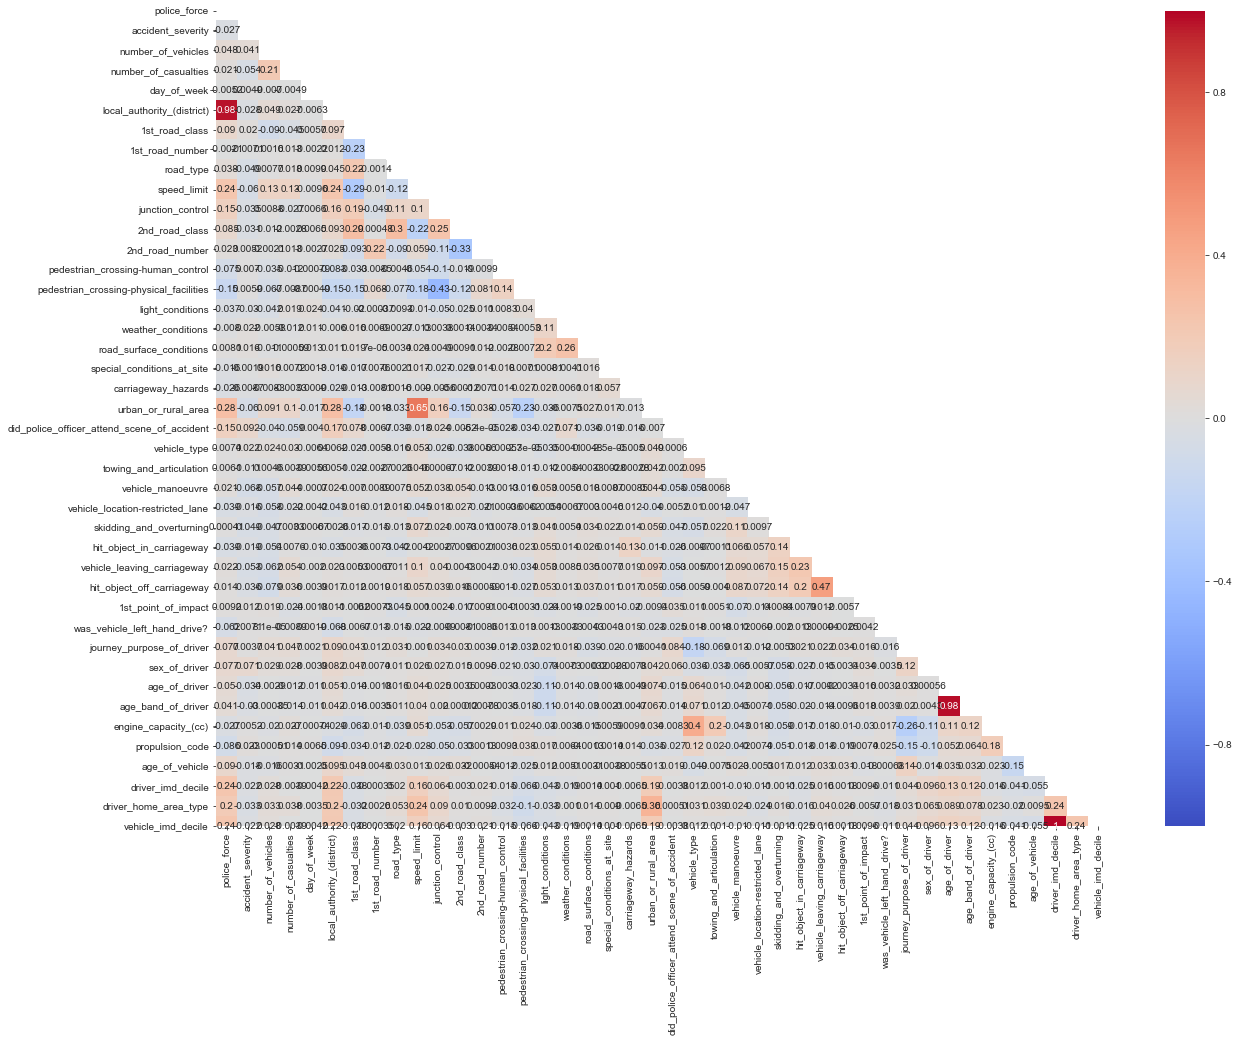

In [414]:
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(master3.corr())
sns.heatmap(master3.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

In [415]:
master3.columns

Index(['police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', '1st_road_class', '1st_road_number',
       'road_type', 'speed_limit', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location', 'coordinates', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'skidding_and_overturning',
       'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', '1st_point_of_impact',
       'was_vehicle_left_hand_drive?', 'journey_purpose_of_driver',
       'sex

In [417]:
master3.drop(columns=['local_authority_(district)'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
